In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df = df.drop(['UDI','Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [5]:
df_num = df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [8]:
df_num = pd.DataFrame(df_num, columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
                                         ,'Torque [Nm]','Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [9]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [10]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [11]:
X = pd.concat([df_cat,df_num],axis=1)
X

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,0.0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,1.0,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,1.0,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9996,1.0,0.0,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.0,0.0,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9998,1.0,0.0,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [12]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score,precision_score, roc_auc_score, recall_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

target_names=["Machine Failure"]




In [51]:
#CONFUSION_MATRIX_STORAGE
CMS = {}
results = {}
#FIT
rf_model01 = RandomForestClassifier(n_estimators=50)
rf_model01.fit(X_train, y_train)

#Predict
rf_model01_prediction = rf_model01.predict(X_test)
CMS["rf_model01"] = confusion_matrix(y_test, rf_model01_prediction)



#VALIDATION
rf_model02_cv_recall = cross_val_score(rf_model01, X, y, cv=5, scoring="recall")



C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [52]:
#STATS
rf_model01_acc = accuracy_score(y_test, rf_model01_prediction)
rf_model01_rec = recall_score(y_test, rf_model01_prediction,average='weighted')
rf_model01_pre = precision_score(y_test,rf_model01_prediction,average='weighted')
rf_model01_f1s = f1_score(y_test, rf_model01_prediction)
rf_model01_test_probs = rf_model01.predict_proba(X_test)[:, 1]
rf_model01_roc_auc = roc_auc_score(y_test, rf_model01_test_probs)


In [53]:
#RESULTS
results['rf_model01'] = {
    "acc":rf_model01_acc,
    "rec":rf_model01_rec,
    "pre":rf_model01_pre,
    "f1s":rf_model01_f1s,
    "roc_auc":rf_model01_roc_auc,
    "cv_recall":np.mean(rf_model02_cv_recall)
}
results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162}}

In [54]:
#GRID_SEARCH
from sklearn.model_selection import GridSearchCV


In [55]:
#PARAM_GRID_01
param_grid_01 = {
    'n_estimators': [32, 64, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_jobs':[10]
}

#RF_MODEL02 - #PARAM_GRID_01
rf_model02 = GridSearchCV(RandomForestClassifier(),param_grid_01,refit=True)
rf_model02.fit(X_train,y_train)
rf_model02_prediction = rf_model02.predict(X_test)
CMS["rf_model02"] = confusion_matrix(y_test, rf_model02_prediction)



#VALIDATION
rf_model02_cv_recall = cross_val_score(rf_model02, X, y, cv=5, scoring="recall")



C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [56]:
#RF_MODEL02_STATS
rf_model02_acc = accuracy_score(y_test, rf_model02_prediction)
rf_model02_rec = recall_score(y_test, rf_model02_prediction,average='weighted')
rf_model02_pre = precision_score(y_test,rf_model02_prediction,average='weighted')
rf_model02_f1s = f1_score(y_test, rf_model02_prediction)
rf_model02_test_probs = rf_model02.predict_proba(X_test)[:, 1]
rf_model02_roc_auc = roc_auc_score(y_test, rf_model02_test_probs)

#ADD TO RESULTS
results['rf_model02'] = {
    "acc":rf_model02_acc,
    "rec":rf_model02_rec,
    "pre":rf_model02_pre,
    "f1s":rf_model02_f1s,
    "roc_auc":rf_model02_roc_auc,
    "cv_recall":np.mean(rf_model02_cv_recall)
}
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877}}

In [57]:
#RF_MODEL02 - #PARAM_GRID01_BEST
model_name = ""
print("rf_model02 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",rf_model02.best_estimator_)
print(f"BEST PARAMS: \n",rf_model02.best_params_)
print(f"BEST SCORE: \n",rf_model02.best_score_)
print(f"BEST INDEX: \n",rf_model02.best_index_)

rf_model02 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(n_estimators=500, n_jobs=10)
BEST PARAMS: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': 10}
BEST SCORE: 
 0.98125
BEST INDEX: 
 2


In [58]:
#PARAM_GRID_02
param_grid_02 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_leaf':[1,2,4],    
}

#RF_MODEL03 - #PARAM_GRID_02
rf_model03 = GridSearchCV(RandomForestClassifier(),param_grid_01,refit=True, scoring='recall')
rf_model03.fit(X_train,y_train)
rf_model03_prediction = rf_model03.predict(X_test)
CMS["rf_model03"] = confusion_matrix(y_test, rf_model03_prediction)

#RF_MODEL03_STATS
rf_model03_acc = accuracy_score(y_test, rf_model03_prediction)
rf_model03_rec = recall_score(y_test, rf_model03_prediction)
rf_model03_pre = precision_score(y_test,rf_model03_prediction)
rf_model03_f1s = f1_score(y_test, rf_model03_prediction)
rf_model03_test_probs = rf_model03.predict_proba(X_test)[:, 1]
rf_model03_roc_auc = roc_auc_score(y_test, rf_model03_test_probs)


#VALIDATION
rf_model03_cv_recall = cross_val_score(rf_model03, X, y, cv=5, scoring="recall")




C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [59]:
#ADD TO RESULTS
results['rf_model03'] = {
    "acc":rf_model03_acc,
    "rec":rf_model03_rec,
    "pre":rf_model03_pre,
    "f1s":rf_model03_f1s,
    "roc_auc":rf_model03_roc_auc,
    "cv_recall":np.mean(rf_model03_cv_recall)
}


In [60]:
#RF_MODEL03 - #PARAM_GRID02_BEST
print("rf_model03 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",rf_model03.best_estimator_)
print(f"BEST PARAMS: \n",rf_model03.best_params_)
print(f"BEST SCORE: \n",rf_model03.best_score_)
print(f"BEST INDEX: \n",rf_model03.best_index_)

rf_model03 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(n_estimators=500, n_jobs=10)
BEST PARAMS: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'n_jobs': 10}
BEST SCORE: 
 0.503843466107617
BEST INDEX: 
 2


In [61]:
#FEATURE_REMOVAL
X_drop = X.drop('Process temperature [K]', axis=1)
X_drop

X_train, X_test, y_train, y_test = train_test_split(X_drop,y,test_size=0.2,random_state=101)

#FIT
rf_model04 = RandomForestClassifier(n_estimators=50)
rf_model04.fit(X_train, y_train)
#PREDICTION
rf_model04_prediction = rf_model04.predict(X_test)
CMS["rf_model04"] = confusion_matrix(y_test, rf_model04_prediction)

#VALIDATION
rf_model04_cv_recall = cross_val_score(rf_model04, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [62]:
#FEATURE_REMOVAL_STATS
rf_model04_acc = accuracy_score(y_test, rf_model04_prediction)
rf_model04_rec = recall_score(y_test, rf_model04_prediction,average='weighted')
rf_model04_pre = precision_score(y_test,rf_model04_prediction,average='weighted')
rf_model04_f1s = f1_score(y_test, rf_model04_prediction)
rf_model04_test_probs = rf_model04.predict_proba(X_test)[:, 1]
rf_model04_roc_auc = roc_auc_score(y_test, rf_model04_test_probs)


In [63]:
#FEATURE_REMOVAL_RESULTS_DICT
results['rf_model04'] = {
    "acc":rf_model04_acc,
    "rec":rf_model04_rec,
    "pre":rf_model04_pre,
    "f1s":rf_model04_f1s,
    "roc_auc":rf_model04_roc_auc,
    "cv_recall":np.mean(rf_model04_cv_recall)
}
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053}}

In [64]:
#UnderSampling
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df['Machine failure'] == 0]
target2 = train_df[train_df['Machine failure'] == 1]

'''target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]'''

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:,-1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]
print(type(y_train_u))

Class 1 count: 7734, Class 2 count: 266
<class 'pandas.core.frame.DataFrame'>


In [65]:
# Create a Random Forest classifier
rf_model05 = RandomForestClassifier(n_estimators=50)

# Train the classifier on the undersampled training data
rf_model05.fit(X_train_u, y_train_u.values.ravel())

# Make predictions on the test set
rf_model05_prediction = rf_model05.predict(X_test)
CMS["rf_model05"] = confusion_matrix(y_test, rf_model05_prediction)

#VALIDATION
rf_model05_cv_recall = cross_val_score(rf_model05, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [66]:
# Model05 Evaluation Metrics
rf_model05_acc = accuracy_score(y_test, rf_model05_prediction)
rf_model05_rec = recall_score(y_test, rf_model05_prediction,average='weighted')
rf_model05_pre = precision_score(y_test,rf_model05_prediction,average='weighted')
rf_model05_f1s = f1_score(y_test, rf_model05_prediction)
rf_model05_test_probs = rf_model05.predict_proba(X_test)[:, 1]
rf_model05_roc_auc = roc_auc_score(y_test, rf_model05_test_probs)

In [67]:
#Print the Evaluation Metrics for the Undersampled Model05
results['rf_model05'] = {
    "acc":rf_model05_acc,
    "rec":rf_model05_rec,
    "pre":rf_model05_pre,
    "f1s":rf_model05_f1s,
    "roc_auc":rf_model05_roc_auc,
    "cv_recall":np.mean(rf_model05_cv_recall)
}

results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132}}

In [68]:
#UnderSampling + gridsearchCV
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df['Machine failure'] == 0]
target2 = train_df[train_df['Machine failure'] == 1]

'''target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]'''

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:,-1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]
print(type(y_train_u))

#PARAM_GRID_03
param_grid_03 = {
    'n_estimators': [64, 128, 256],
    'max_depth': [3, 5, 10],
    'min_samples_leaf':[1,2,3],
}


#RF_MODEL06 - #PARAM_GRID_03
rf_model06 = GridSearchCV(RandomForestClassifier(),param_grid_03,refit=True, scoring='recall')
rf_model06.fit(X_train_u, y_train_u.values.ravel())
rf_model06_prediction = rf_model06.predict(X_test)

#VALIDATION
rf_model06_cv_recall = cross_val_score(rf_model06, X, y, cv=5, scoring="recall")


Class 1 count: 7734, Class 2 count: 266
<class 'pandas.core.frame.DataFrame'>


C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [69]:
CMS["rf_model06"] = confusion_matrix(y_test, rf_model06_prediction)


In [70]:
#DT_MODEL06 - #PARAM_GRID03_BEST
print("dt_model06 gridsearch cv - undersample ")
print(f"BEST ESTIMATOR: \n",rf_model06.best_estimator_)
print(f"BEST PARAMS: \n",rf_model06.best_params_)
print(f"BEST SCORE: \n",rf_model06.best_score_)
print(f"BEST INDEX: \n",rf_model06.best_index_)

dt_model06 gridsearch cv - undersample 
BEST ESTIMATOR: 
 RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=128)
BEST PARAMS: 
 {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 128}
BEST SCORE: 
 0.9622641509433961
BEST INDEX: 
 13


In [71]:
rf_model06_acc = accuracy_score(y_test, rf_model06_prediction)
rf_model06_rec = recall_score(y_test, rf_model06_prediction)
rf_model06_pre = precision_score(y_test,rf_model06_prediction)
rf_model06_f1s = f1_score(y_test, rf_model06_prediction)
rf_model06_test_probs = rf_model06.predict_proba(X_test)[:, 1]
rf_model06_roc_auc = roc_auc_score(y_test, rf_model06_test_probs)


results['rf_model06'] = {
    "acc":rf_model06_acc,
    "rec":rf_model06_rec,
    "pre":rf_model06_pre,
    "f1s":rf_model06_f1s,
    "roc_auc":rf_model06_roc_auc,
    "cv_recall":np.mean(rf_model06_cv_recall)
}

results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132},
 'rf_model06': {'acc': 0.884,
  'rec': 0.9315068493150684,
  'pre': 0.2305084745762712,
  'f1s': 0.36956521739130

In [72]:
#UnderSampling + gridsearchCV


#PARAM_GRID_03
param_grid_04 = {
    'n_estimators': [256],
    'max_depth': [3, 5, 10],
    'min_samples_leaf':[1,2,3],
    'criterion':["gini","entropy"],
    "min_impurity_decrease":[0.0,0.5,1],
    "n_jobs":[8],
    
    
}



#RF_MODEL07 - #PARAM_GRID_03
rf_model07 = GridSearchCV(RandomForestClassifier(),param_grid_04,refit=True, scoring='recall')
rf_model07.fit(X_train, y_train.values.ravel())
rf_model07_prediction = rf_model07.predict(X_test)
CMS["rf_model07"] = confusion_matrix(y_test, rf_model07_prediction)




#VALIDATION
rf_model07_cv_recall = cross_val_score(rf_model07, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [94]:

#RF_MODEL07_STATS
rf_model07_acc = accuracy_score(y_test, rf_model07_prediction)
rf_model07_rec = recall_score(y_test, rf_model07_prediction)
rf_model07_pre = precision_score(y_test,rf_model07_prediction)
rf_model07_f1s = f1_score(y_test, rf_model07_prediction)
rf_model07_test_probs = rf_model07.predict_proba(X_test)[:, 1]
rf_model07_roc_auc = roc_auc_score(y_test, rf_model07_test_probs)
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132},
 'rf_model06': {'acc': 0.884,
  'rec': 0.9315068493150684,
  'pre': 0.2305084745762712,
  'f1s': 0.36956521739130

In [74]:
CMS["rf_model07"] = confusion_matrix(y_test, rf_model07_prediction)

In [75]:
print(classification_report(rf_model07_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1972
           1       0.34      0.89      0.50        28

    accuracy                           0.97      2000
   macro avg       0.67      0.93      0.74      2000
weighted avg       0.99      0.97      0.98      2000


In [76]:
print(classification_report(rf_model06_prediction, y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1705
           1       0.93      0.23      0.37       295

    accuracy                           0.88      2000
   macro avg       0.91      0.61      0.65      2000
weighted avg       0.89      0.88      0.85      2000


In [77]:
print(classification_report(rf_model05_prediction, y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1722
           1       0.92      0.24      0.38       278

    accuracy                           0.89      2000
   macro avg       0.90      0.62      0.66      2000
weighted avg       0.89      0.89      0.86      2000


In [78]:
print(classification_report(rf_model04_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1965
           1       0.41      0.86      0.56        35

    accuracy                           0.98      2000
   macro avg       0.70      0.92      0.77      2000
weighted avg       0.99      0.98      0.98      2000


In [79]:
print(classification_report(rf_model03_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1964
           1       0.48      0.97      0.64        36

    accuracy                           0.98      2000
   macro avg       0.74      0.98      0.82      2000
weighted avg       0.99      0.98      0.98      2000


In [80]:
print(classification_report(rf_model02_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1962
           1       0.49      0.95      0.65        38

    accuracy                           0.98      2000
   macro avg       0.75      0.96      0.82      2000
weighted avg       0.99      0.98      0.98      2000


In [81]:
print(classification_report(rf_model01_prediction, y_test))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1964
           1       0.48      0.97      0.64        36

    accuracy                           0.98      2000
   macro avg       0.74      0.98      0.82      2000
weighted avg       0.99      0.98      0.98      2000


In [95]:
results['rf_model07'] = {
    "acc":rf_model07_acc,
    "rec":rf_model07_rec,
    "pre":rf_model07_pre,
    "f1s":rf_model07_f1s,
    "roc_auc":rf_model07_roc_auc,
    "cv_recall":np.mean(rf_model07_cv_recall)
}
results

{'rf_model01': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9803440540846345,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9565653190778484,
  'cv_recall': 0.4336259877085162},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.9805,
  'pre': 0.9799089677557808,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.946581029494352,
  'cv_recall': 0.38358208955223877},
 'rf_model03': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9513225895884724,
  'cv_recall': 0.40131694468832313},
 'rf_model04': {'acc': 0.976,
  'rec': 0.976,
  'pre': 0.9737014903671393,
  'f1s': 0.5555555555555556,
  'roc_auc': 0.9301632888086386,
  'cv_recall': 0.43064091308165053},
 'rf_model05': {'acc': 0.8915,
  'rec': 0.8915,
  'pre': 0.9689396197327853,
  'f1s': 0.3817663817663818,
  'roc_auc': 0.9350967861179631,
  'cv_recall': 0.4425812115891132},
 'rf_model06': {'acc': 0.884,
  'rec': 0.9315068493150684,
  'pre': 0.2305084745762712,
  'f1s': 0.36956521739130

In [83]:
#RF_MODEL07 - #PARAM_GRID02_BEST
print("rf_model07 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",rf_model07.best_estimator_)
print(f"BEST PARAMS: \n",rf_model07.best_params_)
print(f"BEST SCORE: \n",rf_model07.best_score_)
print(f"BEST INDEX: \n",rf_model07.best_index_)

rf_model07 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=256,
                       n_jobs=8)
BEST PARAMS: 
 {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'n_estimators': 256, 'n_jobs': 8}
BEST SCORE: 
 0.39489867225716285
BEST INDEX: 
 45


In [17]:
#random over 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_ros,y_ros,test_size=0.2,random_state=101)
rf_model08 = RandomForestClassifier(n_estimators=256, n_jobs=-1)
rf_model08.fit(X_train_r, y_train_r)
rf_model08_prediction = rf_model08.predict(X_test_r)


C:\Users\Rober\AppData\Local\Temp\ipykernel_12616\2682616712.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model08.fit(X_train_r, y_train_r)


In [84]:

#PRINT RESULTS
for model,metrics in results.items():
    print(f"Model:{model}")
    for metric,value in metrics.items():
        print(f"{metric}: {value}")
    print("-------------")

Model:rf_model01
acc: 0.9805
rec: 0.9805
pre: 0.9803440540846345
f1s: 0.6422018348623852
roc_auc: 0.9565653190778484
cv_recall: 0.4336259877085162
-------------
Model:rf_model02
acc: 0.9805
rec: 0.9805
pre: 0.9799089677557808
f1s: 0.6486486486486486
roc_auc: 0.946581029494352
cv_recall: 0.38358208955223877
-------------
Model:rf_model03
acc: 0.9805
rec: 0.4794520547945205
pre: 0.9722222222222222
f1s: 0.6422018348623852
roc_auc: 0.9513225895884724
cv_recall: 0.40131694468832313
-------------
Model:rf_model04
acc: 0.976
rec: 0.976
pre: 0.9737014903671393
f1s: 0.5555555555555556
roc_auc: 0.9301632888086386
cv_recall: 0.43064091308165053
-------------
Model:rf_model05
acc: 0.8915
rec: 0.8915
pre: 0.9689396197327853
f1s: 0.3817663817663818
roc_auc: 0.9350967861179631
cv_recall: 0.4425812115891132
-------------
Model:rf_model06
acc: 0.884
rec: 0.9315068493150684
pre: 0.2305084745762712
f1s: 0.3695652173913044
roc_auc: 0.9333266984666349
cv_recall: 0.39530289727831425
-------------
Model:rf_m

In [29]:

#RF_MODEL08_STATS
rf_model08_acc = accuracy_score(y_test_r, rf_model08_prediction)
rf_model08_rec = recall_score(y_test_r, rf_model08_prediction)
rf_model08_pre = precision_score(y_test_r,rf_model08_prediction)
rf_model08_f1s = f1_score(y_test_r, rf_model08_prediction)
rf_model08_test_probs = rf_model08.predict_proba(X_test_r)[:, 1]
rf_model08_roc_auc = roc_auc_score(y_test_r, rf_model08_test_probs)
results = {}
CMS={}
results['rf_model08'] = {
    "acc":rf_model08_acc,
    "rec":rf_model08_rec,
    "pre":rf_model08_pre,
    "f1s":rf_model08_f1s,
    "roc_auc":rf_model08_roc_auc
}
CMS["rf_model08"] = confusion_matrix(y_test_r, rf_model08_prediction)

results


{'rf_model08': {'acc': 0.9958602846054334,
  'rec': 1.0,
  'pre': 0.9918074756784434,
  'f1s': 0.9958868894601542,
  'roc_auc': 1.0}}

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=101)
rf_model09 = RandomForestClassifier(n_estimators=256, n_jobs=-1)
rf_model09.fit(X_train_smote, y_train_smote)
rf_model09_prediction = rf_model09.predict(X_test_smote)

C:\Users\Rober\AppData\Local\Temp\ipykernel_12616\3338084772.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model09.fit(X_train_smote, y_train_smote)


In [35]:
#RF_MODEL09_STATS
rf_model09_acc = accuracy_score(y_test_r, rf_model09_prediction)
rf_model09_rec = recall_score(y_test_r, rf_model09_prediction)
rf_model09_pre = precision_score(y_test_r,rf_model09_prediction)
rf_model09_f1s = f1_score(y_test_r, rf_model09_prediction)
rf_model09_test_probs = rf_model09.predict_proba(X_test_r)[:, 1]
rf_model09_roc_auc = roc_auc_score(y_test_r, rf_model09_test_probs)
results = {}
CMS={}
results['rf_model09'] = {
    "acc":rf_model09_acc,
    "rec":rf_model09_rec,
    "pre":rf_model09_pre,
    "f1s":rf_model09_f1s,
    "roc_auc":rf_model09_roc_auc
}
CMS["rf_model09"] = confusion_matrix(y_test_r, rf_model09_prediction)

results

{'rf_model09': {'acc': 0.9764553686934023,
  'rec': 0.9845121321631388,
  'pre': 0.9690040650406504,
  'f1s': 0.9766965428937259,
  'roc_auc': 0.9993805120636138}}

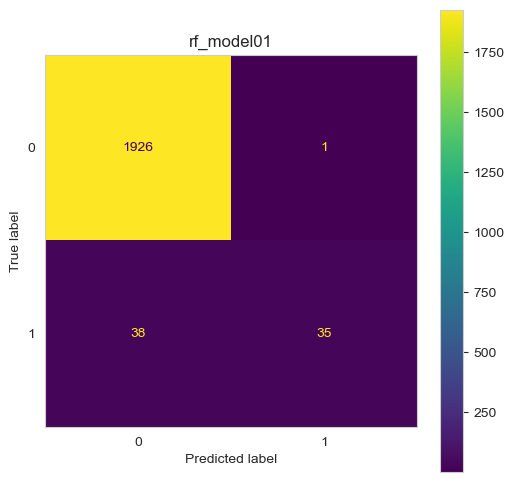

In [85]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model01'], display_labels=rf_model01.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model01')
plt.grid(None)
disp.plot(ax=ax)

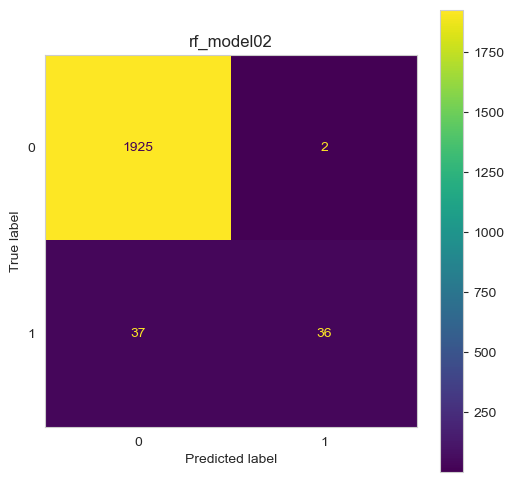

In [86]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model02'], display_labels=rf_model02.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model02')
plt.grid(None)
disp.plot(ax=ax)

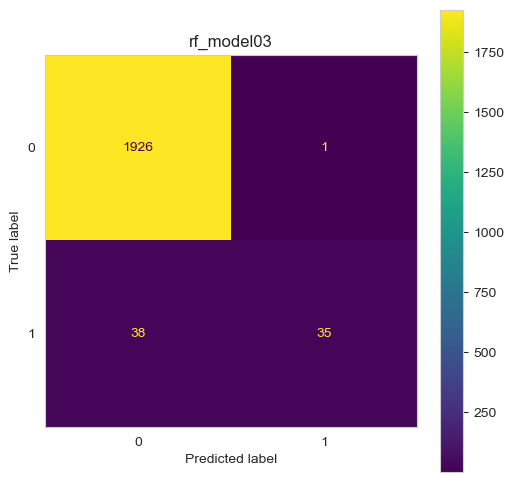

In [87]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model03'], display_labels=rf_model03.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model03')
plt.grid(None)
disp.plot(ax=ax)

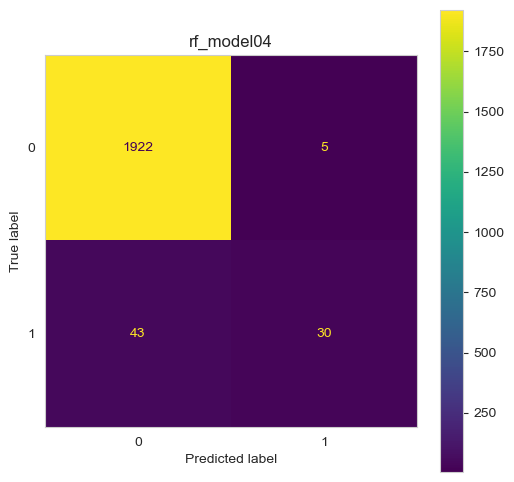

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model04'], display_labels=rf_model04.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model04')
plt.grid(None)
disp.plot(ax=ax)

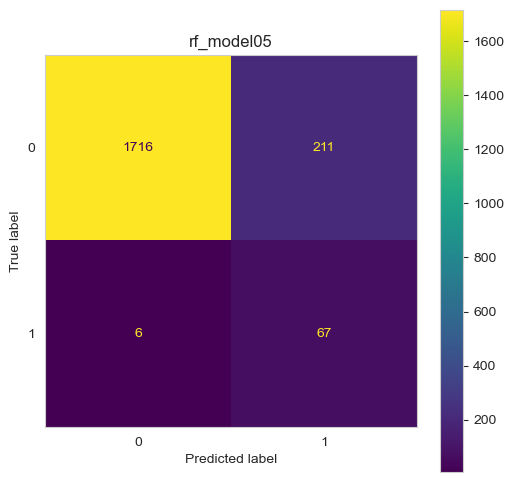

In [89]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model05'], display_labels=rf_model05.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model05')
plt.grid(None)
disp.plot(ax=ax)

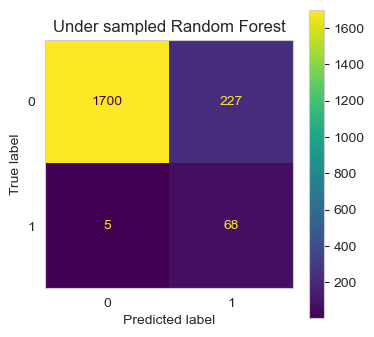

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model06'], display_labels=rf_model06.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Under sampled Random Forest')
plt.grid(None)
disp.plot(ax=ax)

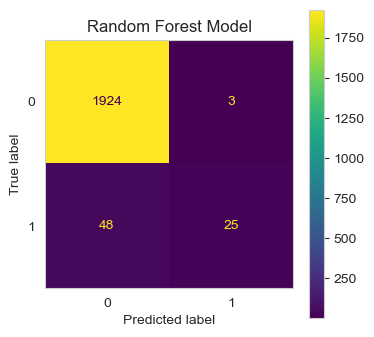

In [91]:

disp.plot(ax=ax)
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model07'], display_labels=rf_model07.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Random Forest Model')
plt.grid(None)
disp.plot(ax=ax)

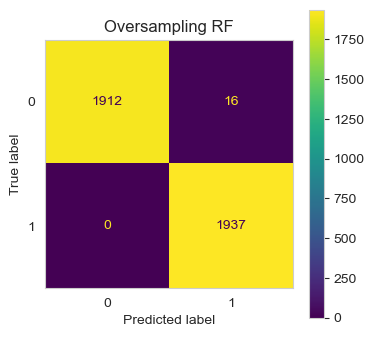

In [32]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model08'], display_labels=rf_model08.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('Oversampling RF')
plt.grid(None)
disp.plot(ax=ax)


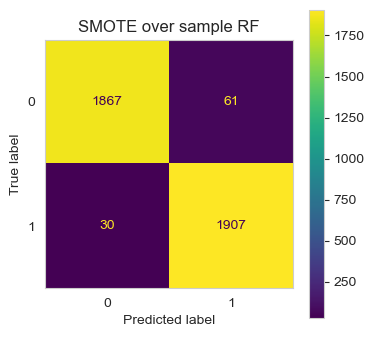

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model09'], display_labels=rf_model09.classes_)
fig, ax = plt.subplots(figsize=(4, 4))
plt.title('SMOTE over sample RF')
plt.grid(None)
disp.plot(ax=ax)


In [46]:
import os
os.cpu_count()

20